## **Exploratory Data Analysis (EDA) and Price Prediction of S&P 500 Companies**

### **Some Insights about the variables included in the dataframe**

**Market Cap**- Total market value of a company's outstanding shares of stock, calculated by multiplying the price of a share by the total number of shares outstanding;

**Earnings/Share (EPS)** - financial ratio which divides company's net earnings by the average outstanding shares of it's common stock;

**Price/Earnings (P/E)** - Metric which is computed by dividing the price of the stock by the company's annual earnings per share;

**Price/Sales (P/S)** - Valuation metric for stocks, calculated by dividing company's market capitalization by the company's total sales or revenue over the past 12 months;

**Price/Book (P/B)** - Ratio of the company's current market capitalization to its book value;

**Dividend Yield** - financial ratio that shows how much a company pays out in dividends each year relative to its stock price;

**Return on Assets (ROA)** - indicator of how a company manages existing assets when generating earnings;

**Return on Equity (ROE)** - indicator of how much net income a company generates per dollar of invested capital.

### **1. Importing modules**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

### **2. Importing the data and initial checkup**
All the data was taken from the website _www.barchart.com_.

In [2]:
data = pd.read_csv('S&P500_FundamentalData.csv', na_values = 'N/A')
data.head()

,Ticker,Company,Sector,Industry,Market Cap,Price,52 Week High,52 Week Low,Dividend Yield,Price/Sales,Price/Book,Price/Earnings,Earnings/Share,ROA,ROE,5Y Revenue Growth,1Y Implied Volatility
0,A,Agilent Technologies,Health Care,Health Care Equipment,4.616354e+10,155.92,160.26,112.52,0.01,6.61,8.53,29.34,5.21,0.15,0.30,0.53,0.33
1,AAL,American Airlines Group,Industrials,Airlines,1.061938e+10,16.34,21.42,11.65,0.00,0.23,NaN,0.00,-2.29,-0.02,0.00,-0.26,0.58
2,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,8.866804e+09,147.49,237.39,138.52,0.04,0.82,3.17,11.72,12.22,0.06,0.26,0.15,0.35
3,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",2.180000e+12,137.87,179.61,124.17,0.01,5.43,42.47,22.14,6.11,0.28,1.61,0.72,0.33
4,ABBV,AbbVie,Health Care,Pharmaceuticals,2.650000e+11,149.59,175.91,128.26,0.04,4.60,16.41,10.90,13.64,0.17,1.56,1.19,0.26


In [3]:
# Show column names
list(data.columns)

['Ticker',
 'Company',
 'Sector',
 'Industry',
 'Market Cap',
 'Price',
 '52 Week High',
 '52 Week Low',
 'Dividend Yield',
 'Price/Sales',
 'Price/Book',
 'Price/Earnings',
 'Earnings/Share',
 'ROA',
 'ROE',
 '5Y Revenue Growth',
 '1Y Implied Volatility']

In [4]:
# Dataset size
print('The dataset has {} rows and {} columns.'.format(data.shape[0],data.shape[1]))

The dataset has 503 rows and 17 columns.


In [5]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ticker                 503 non-null    object 
 1   Company                503 non-null    object 
 2   Sector                 503 non-null    object 
 3   Industry               503 non-null    object 
 4   Market Cap             503 non-null    float64
 5   Price                  503 non-null    float64
 6   52 Week High           503 non-null    float64
 7   52 Week Low            503 non-null    float64
 8   Dividend Yield         503 non-null    float64
 9   Price/Sales            503 non-null    float64
 10  Price/Book             469 non-null    float64
 11  Price/Earnings         502 non-null    float64
 12  Earnings/Share         502 non-null    float64
 13  ROA                    502 non-null    float64
 14  ROE                    502 non-null    float64
 15  5Y Rev

Ticker                    0
Company                   0
Sector                    0
Industry                  0
Market Cap                0
Price                     0
52 Week High              0
52 Week Low               0
Dividend Yield            0
Price/Sales               0
Price/Book               34
Price/Earnings            1
Earnings/Share            1
ROA                       1
ROE                       1
5Y Revenue Growth         1
1Y Implied Volatility     0
dtype: int64


<AxesSubplot: >

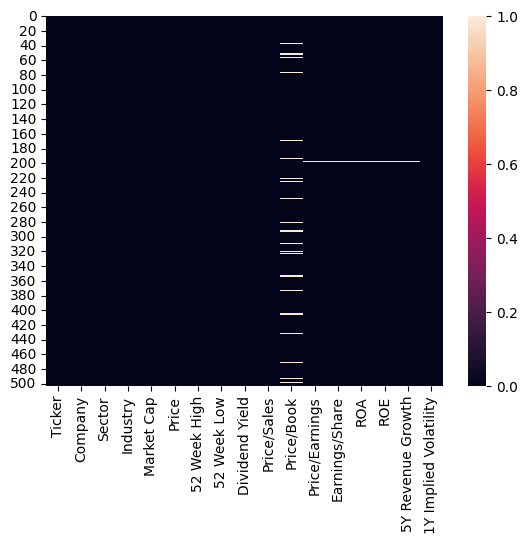

In [6]:
# Checking null values
print(data.isnull().sum())
sns.heatmap(data.isnull())

In [7]:
# Converting Market Cap to bilions USD
data['Market Cap'] = data['Market Cap'].div(1000000000)

In [8]:
# Descriptive statistics of numeric variables
from scipy.stats import jarque_bera
def descriptive_stats(data):
    descriptive_stats = data.describe(exclude='object').drop('count').round(3)
    skew = data.skew(numeric_only=True).round(3)
    kurt = data.kurtosis(numeric_only=True).round(3)
    jb_pvalues=[]
    for col in data.select_dtypes(exclude='object').columns:
        jb_pvalue = jarque_bera(data[col].dropna(),)[1].round(3)
        jb_pvalues.append(jb_pvalue)
    adv_stats_df = pd.DataFrame({'skewness':skew, 'kurtosis':kurt, 'JB p-value':jb_pvalues}).T
    return pd.concat([descriptive_stats,adv_stats_df])
descriptive_stats(data)

,Market Cap,Price,52 Week High,52 Week Low,Dividend Yield,Price/Sales,Price/Book,Price/Earnings,Earnings/Share,ROA,ROE,5Y Revenue Growth,1Y Implied Volatility
mean,72.762,170.116,206.690,129.259,0.018,3.780,7.703,21.374,8.910,0.089,0.431,0.952,0.353
std,169.805,299.975,336.875,215.464,0.016,3.417,25.981,20.924,21.874,0.072,4.612,7.599,0.101
min,5.373,5.220,12.930,4.960,0.000,0.110,0.410,0.000,-16.990,-0.120,-36.570,-0.870,0.000
25%,16.565,60.255,74.440,46.275,0.010,1.405,1.910,11.985,3.150,0.040,0.110,0.150,0.290
50%,30.789,106.960,132.960,82.390,0.020,2.650,3.200,17.555,5.685,0.070,0.180,0.410,0.330
75%,62.991,196.345,245.750,155.580,0.030,4.975,6.310,24.990,9.820,0.130,0.320,0.770,0.400
max,2180.000,5024.070,5569.800,3576.010,0.080,18.890,473.820,293.450,447.810,0.450,91.830,169.410,0.730
skewness,7.933,10.474,10.056,10.139,0.680,1.778,14.213,6.795,16.608,1.048,14.772,21.839,1.019
kurtosis,78.518,148.188,139.573,141.470,-0.002,3.427,236.724,70.423,326.241,1.883,317.783,484.749,1.807
JB p-value,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


- The average stock price of the companies that make up the S&P 500 index is equal to $170;
- On average, companies are profitable (EPS>0);
- Regarding the shape of the data, all variables are positively skewed, which indicates that the values are more concentrated towards the right side of the distribution, and the left tail is spread out. Unlike the other variables, Dividend Yield has a negative kurtosis, so it has a platykurtic distribution, meaning that most values are located close to the mean and less data are located on the tails;
- Since the p-value of Jarque-Bera test is equal to zero, we can reject the null hypothesis that each variable comes from a normal distribution.

In [9]:
# Name and number of all S&P 500 Sectors
print(f'Total number of sectors = {len(data.Sector.unique())}:\n')
print(data.Sector.unique())

Total number of sectors = 11:

['Health Care' 'Industrials' 'Consumer Discretionary'
 'Information Technology' 'Financials' 'Consumer Staples' 'Utilities'
 'Materials' 'Real Estate' 'Energy' 'Communication Services']


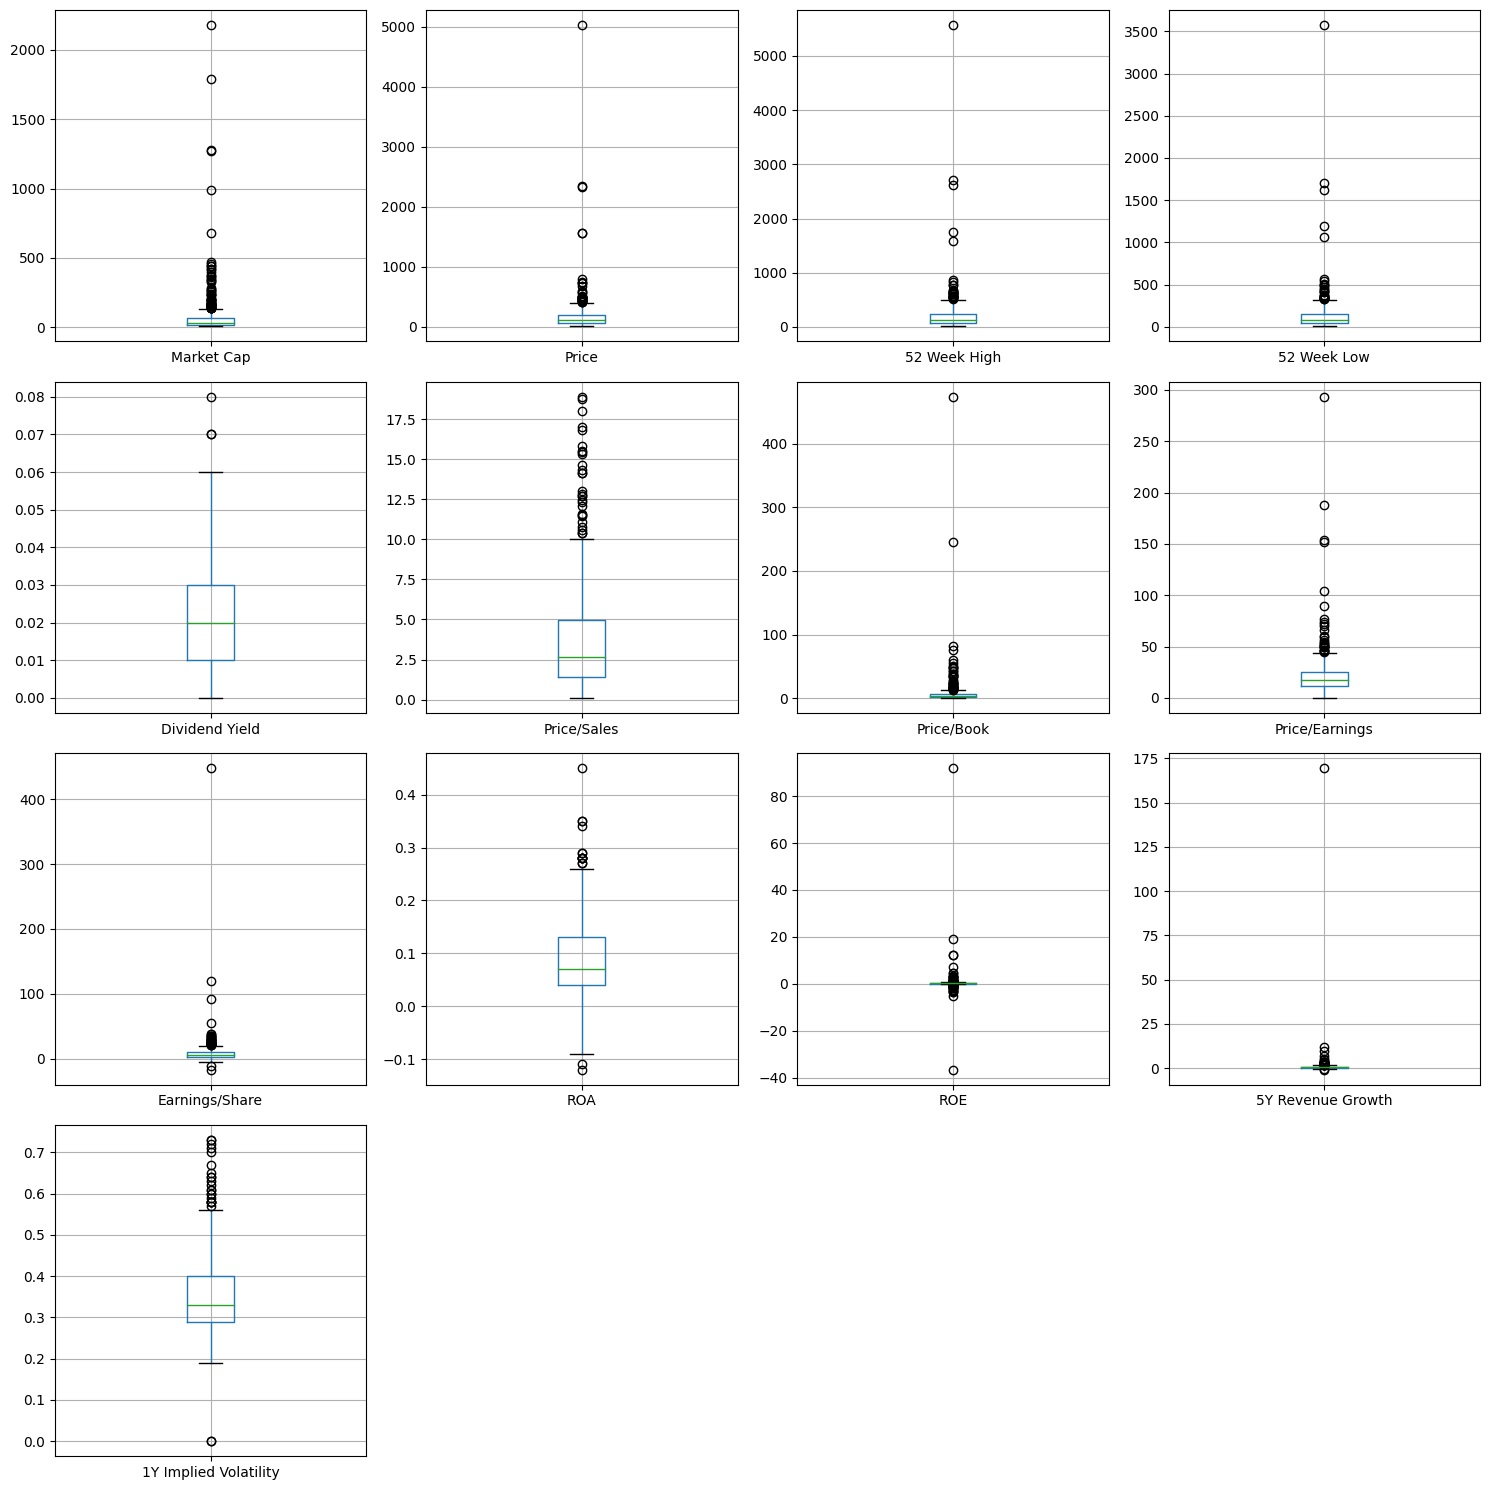

In [10]:
# Checking for the presence of outliers with box plots
data1 = data.select_dtypes(exclude=['object'])
plt.figure(figsize=(15,15))
for column,num in zip(data1.columns, range(len(data1.columns))):
    plt.subplot(4,4,num+1)
    data1.boxplot([column])
plt.tight_layout()

We can see that most of the variables have outliers.

Text(0.5, 1.0, 'Correlation Heatmap\n')

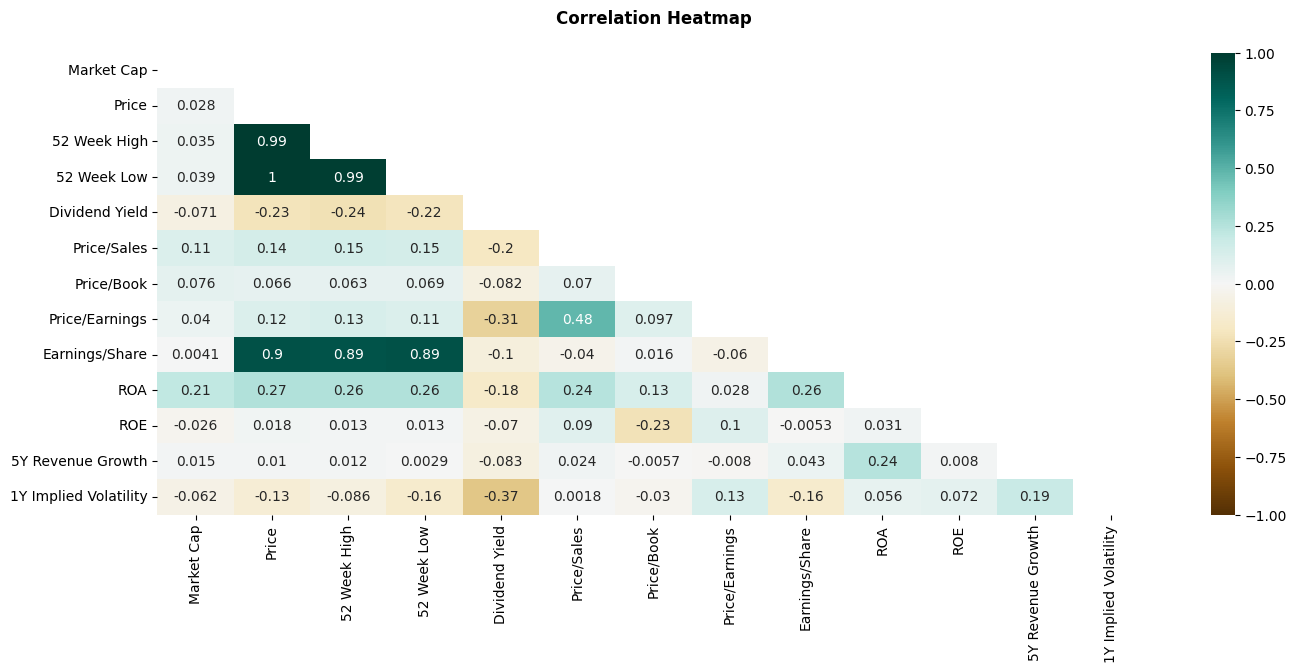

In [11]:
# Correlation between numeric variables
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(data.iloc[:,4:].corr(), dtype=bool))
heatmap = sns.heatmap(data.iloc[:,4:].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Heatmap\n', weight='bold')

- There is a strong positive correlation between Earnings/Share and prices;
- Price/Book is the multiple less corelated with the price (and with the other variables as well, except with ROE);
- Dividend Yield moves in the opposite direction of all variables.

### **3. Sector Breakdown**

##### **Market Capitalization and number of companies per sector**

                    Sector  Market_Cap  Nr_Companies
7   Information Technology        9084            76
5              Health Care        5171            64
0   Communication Services        4264            25
4               Financials        4166            67
1   Consumer Discretionary        3676            56
6              Industrials        2915            70
2         Consumer Staples        2621            33
3                   Energy        1789            23
10               Utilities        1019            30
8                Materials         955            29
9              Real Estate         934            30


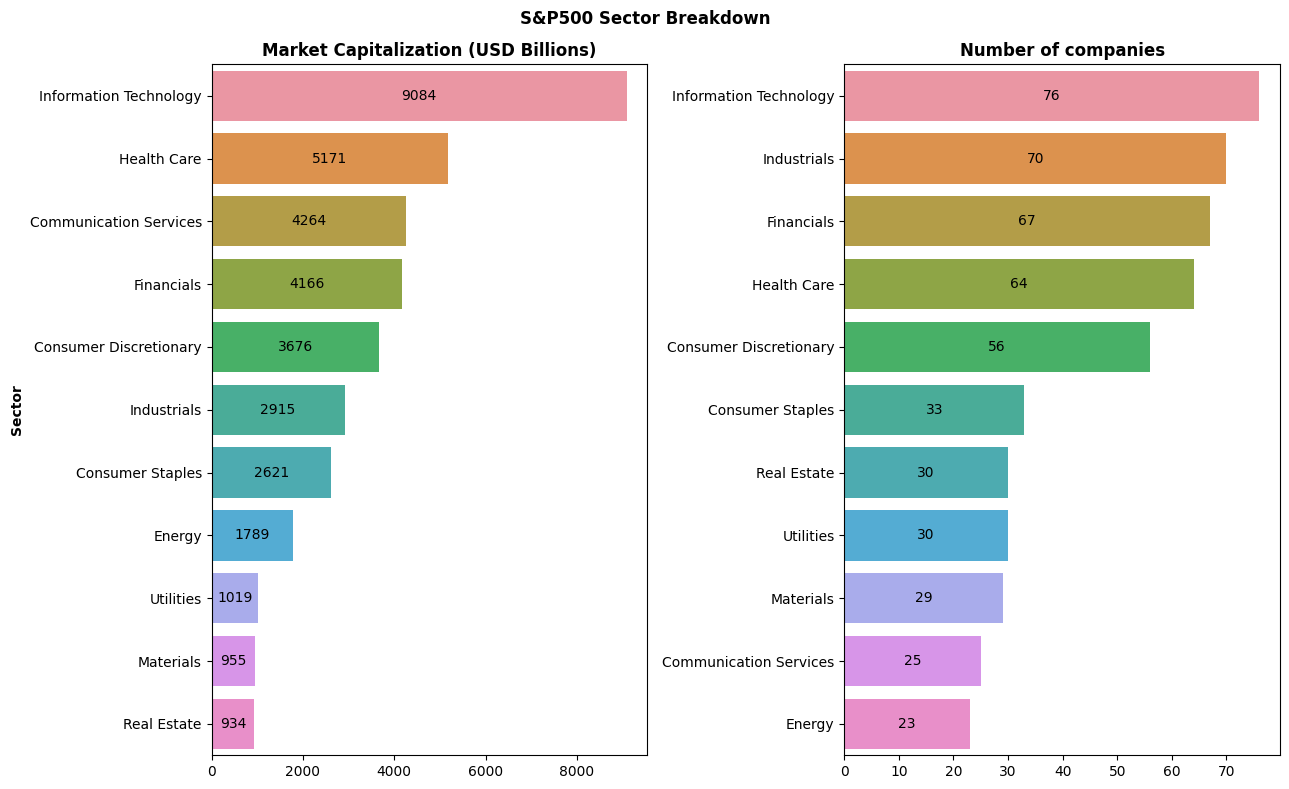

In [12]:
# in absolute values
sectors = data.groupby('Sector').agg(Market_Cap=('Market Cap','sum'), Nr_Companies=('Company','count'))
sectors = sectors.astype(int).reset_index()
print(sectors.sort_values('Market_Cap', ascending=False))

fig = plt.figure(num=None, figsize=(13, 8))
fig.suptitle('S&P500 Sector Breakdown', weight='bold')

plt.subplot(1,2,1)
ax1 = sns.barplot(x='Market_Cap', y='Sector', data=sectors.sort_values('Market_Cap', 
    ascending=False))
ax1.set_ylabel('Sector', weight='bold'); ax1.set_xlabel('')
ax1.set_title('Market Capitalization (USD Billions)', weight='bold')
ax1.bar_label(ax1.containers[0], label_type='center')

plt.subplot(1,2,2)
ax2 = sns.barplot(x='Nr_Companies', y='Sector', data=sectors.sort_values('Nr_Companies',
    ascending=False))
ax2.bar_label(ax2.containers[0], label_type='center')
ax2.set_ylabel(''); ax2.set_xlabel('')
ax2.set_title('Number of companies', weight='bold')
plt.tight_layout()

- Information Technology is the sector that accounts most for the market cap of the index;
- Information Technology, Industrials and Financials are the sectors with the largest number of companies on S&P500.

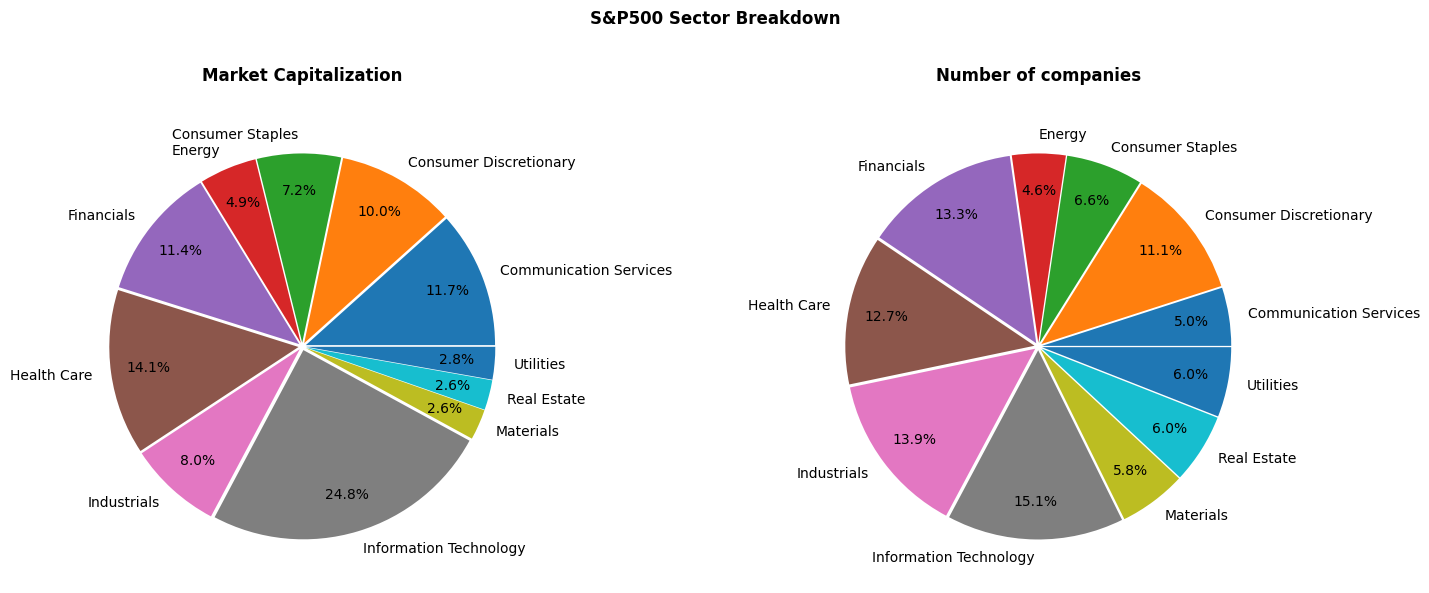

In [13]:
# as a percentage
sectors_perc = sectors.copy()
for col in sectors_perc.columns[-2:]:
    sectors_perc[col]=sectors_perc[col].div(sectors_perc[col].sum()).mul(100)

fig = plt.figure(figsize=(15,6))
fig.suptitle('S&P500 Sector Breakdown\n', weight='bold')

plt.subplot(1,2,1)
ax1 = plt.pie(x=sectors_perc['Market_Cap'],labels=sectors_perc['Sector'], 
    explode=[0.02]*len(sectors_perc['Market_Cap']), autopct='%1.1f%%', pctdistance=0.8)
plt.title('Market Capitalization\n', weight='bold')

plt.subplot(1,2,2)
ax2 = plt.pie(x=sectors_perc['Nr_Companies'],labels=sectors_perc['Sector'], 
    explode=[0.02]*len(sectors_perc['Nr_Companies']), autopct='%1.1f%%', pctdistance=0.8)
plt.title('Number of companies\n', weight='bold')
plt.tight_layout()

##### **Average EPS by sector**

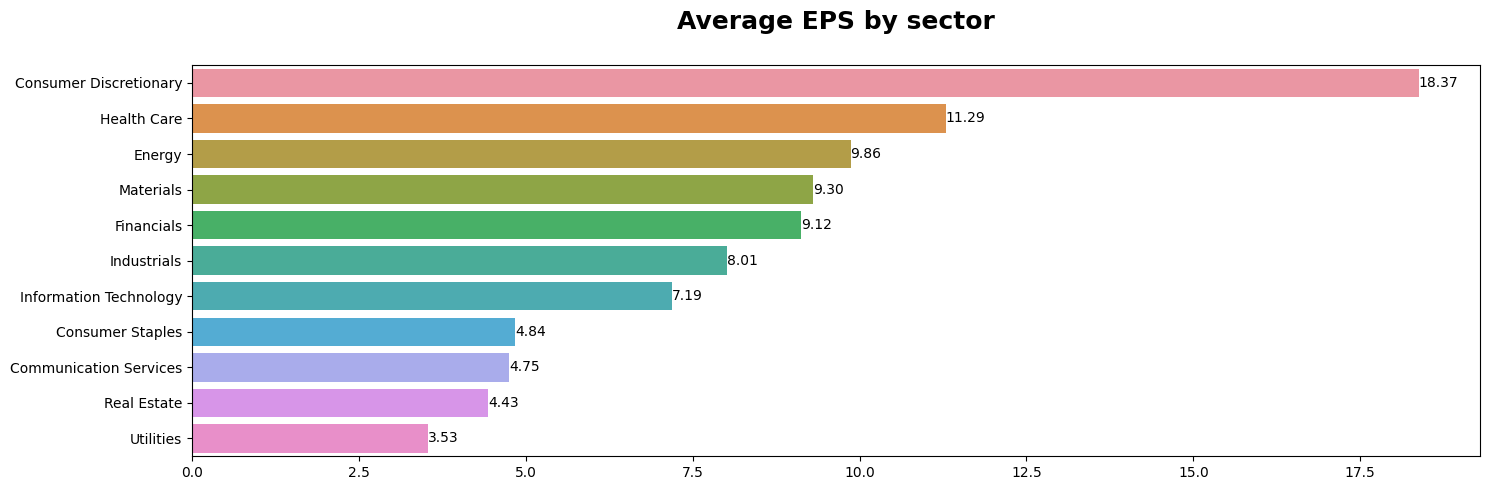

In [14]:
fig = plt.figure(figsize=(15,5))
ax = sns.barplot(y='Sector', x='Earnings/Share', data=data, order=data.groupby('Sector')['Earnings/Share'].agg('mean').sort_values(ascending=False).index, errorbar=None)
plt.title('Average EPS by sector\n', weight='bold', size=18); plt.ylabel(''); plt.xlabel('')
plt.bar_label(ax.containers[0], fmt= "%.2f", label_type='edge')
plt.tight_layout()

- EPS is one of the ratios used to estimate corporate value, and helps to compare the perfomance between competitors. The Consumer Discretionary stands out for having the highest average EPS, meaning that the market has very positive expectations on its profitability and will pay more for the shares of companies in this sector;
- In contrast, there are four sector with an EPS less than five, making them less attractive to investment and leading to the devaluation of its stocks.

##### **Number of profit/loss making companies by sector**

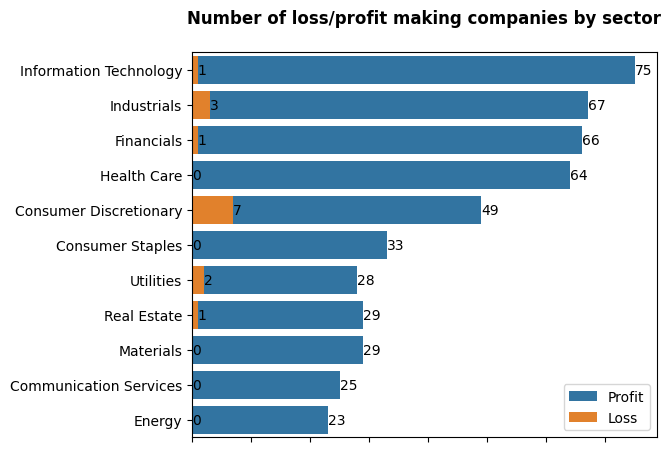

In [15]:
# According to EPS ratio
loss_profit_comp = data.copy()
loss_profit_comp['Loss_Profit'] = ['Loss' if x<0 else 'Profit' for x in  loss_profit_comp['Earnings/Share']]

fig = plt.figure(figsize=(6,5))
ax = sns.countplot(data=loss_profit_comp, y='Sector', hue='Loss_Profit', dodge=False,
    order = loss_profit_comp['Sector'].value_counts().index)
ax.set_title('Number of loss/profit making companies by sector\n', weight='bold')
ax.set_xlabel(''); ax.set_ylabel('');ax.set(xticklabels=[])
for i in range(0,2):
    ax.bar_label(ax.containers[i] , label_type='edge')
plt.legend()
plt.show()

Despite having the highest average value, the Consumer Discretionary sector comprises seven companies with Earnings/Share under 0.

In [16]:
# Loss-making companies in detail
loss_profit_comp[loss_profit_comp['Loss_Profit']=='Loss'][['Ticker','Company','Sector','Industry','Earnings/Share']].sort_values('Earnings/Share')

,Ticker,Company,Sector,Industry,Earnings/Share
52,BA,Boeing,Industrials,Aerospace & Defense,-16.99
389,RCL,Royal Caribbean Group,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",-11.17
325,NCLH,Norwegian Cruise Line Holdings,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",-5.77
279,LNC,Lincoln Financial,Financials,Multi-line Insurance,-4.78
83,CCL,Carnival,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",-4.72
493,WYNN,Wynn Resorts,Consumer Discretionary,Casinos & Gaming,-4.60
125,CZR,Caesars Entertainment,Consumer Discretionary,Casinos & Gaming,-2.85
1,AAL,American Airlines Group,Industrials,Airlines,-2.29
456,UAL,United Airlines Holdings,Industrials,Airlines,-1.60
285,LVS,Las Vegas Sands,Consumer Discretionary,Casinos & Gaming,-1.23


- Boeing was the company with the highest loss per share.
- Industries of Hotels, Resorts & Cruise Lines and Casinos & Gaming among those with the highest number of loss-making companies.

##### **Top companies by sector according to market capitalization**

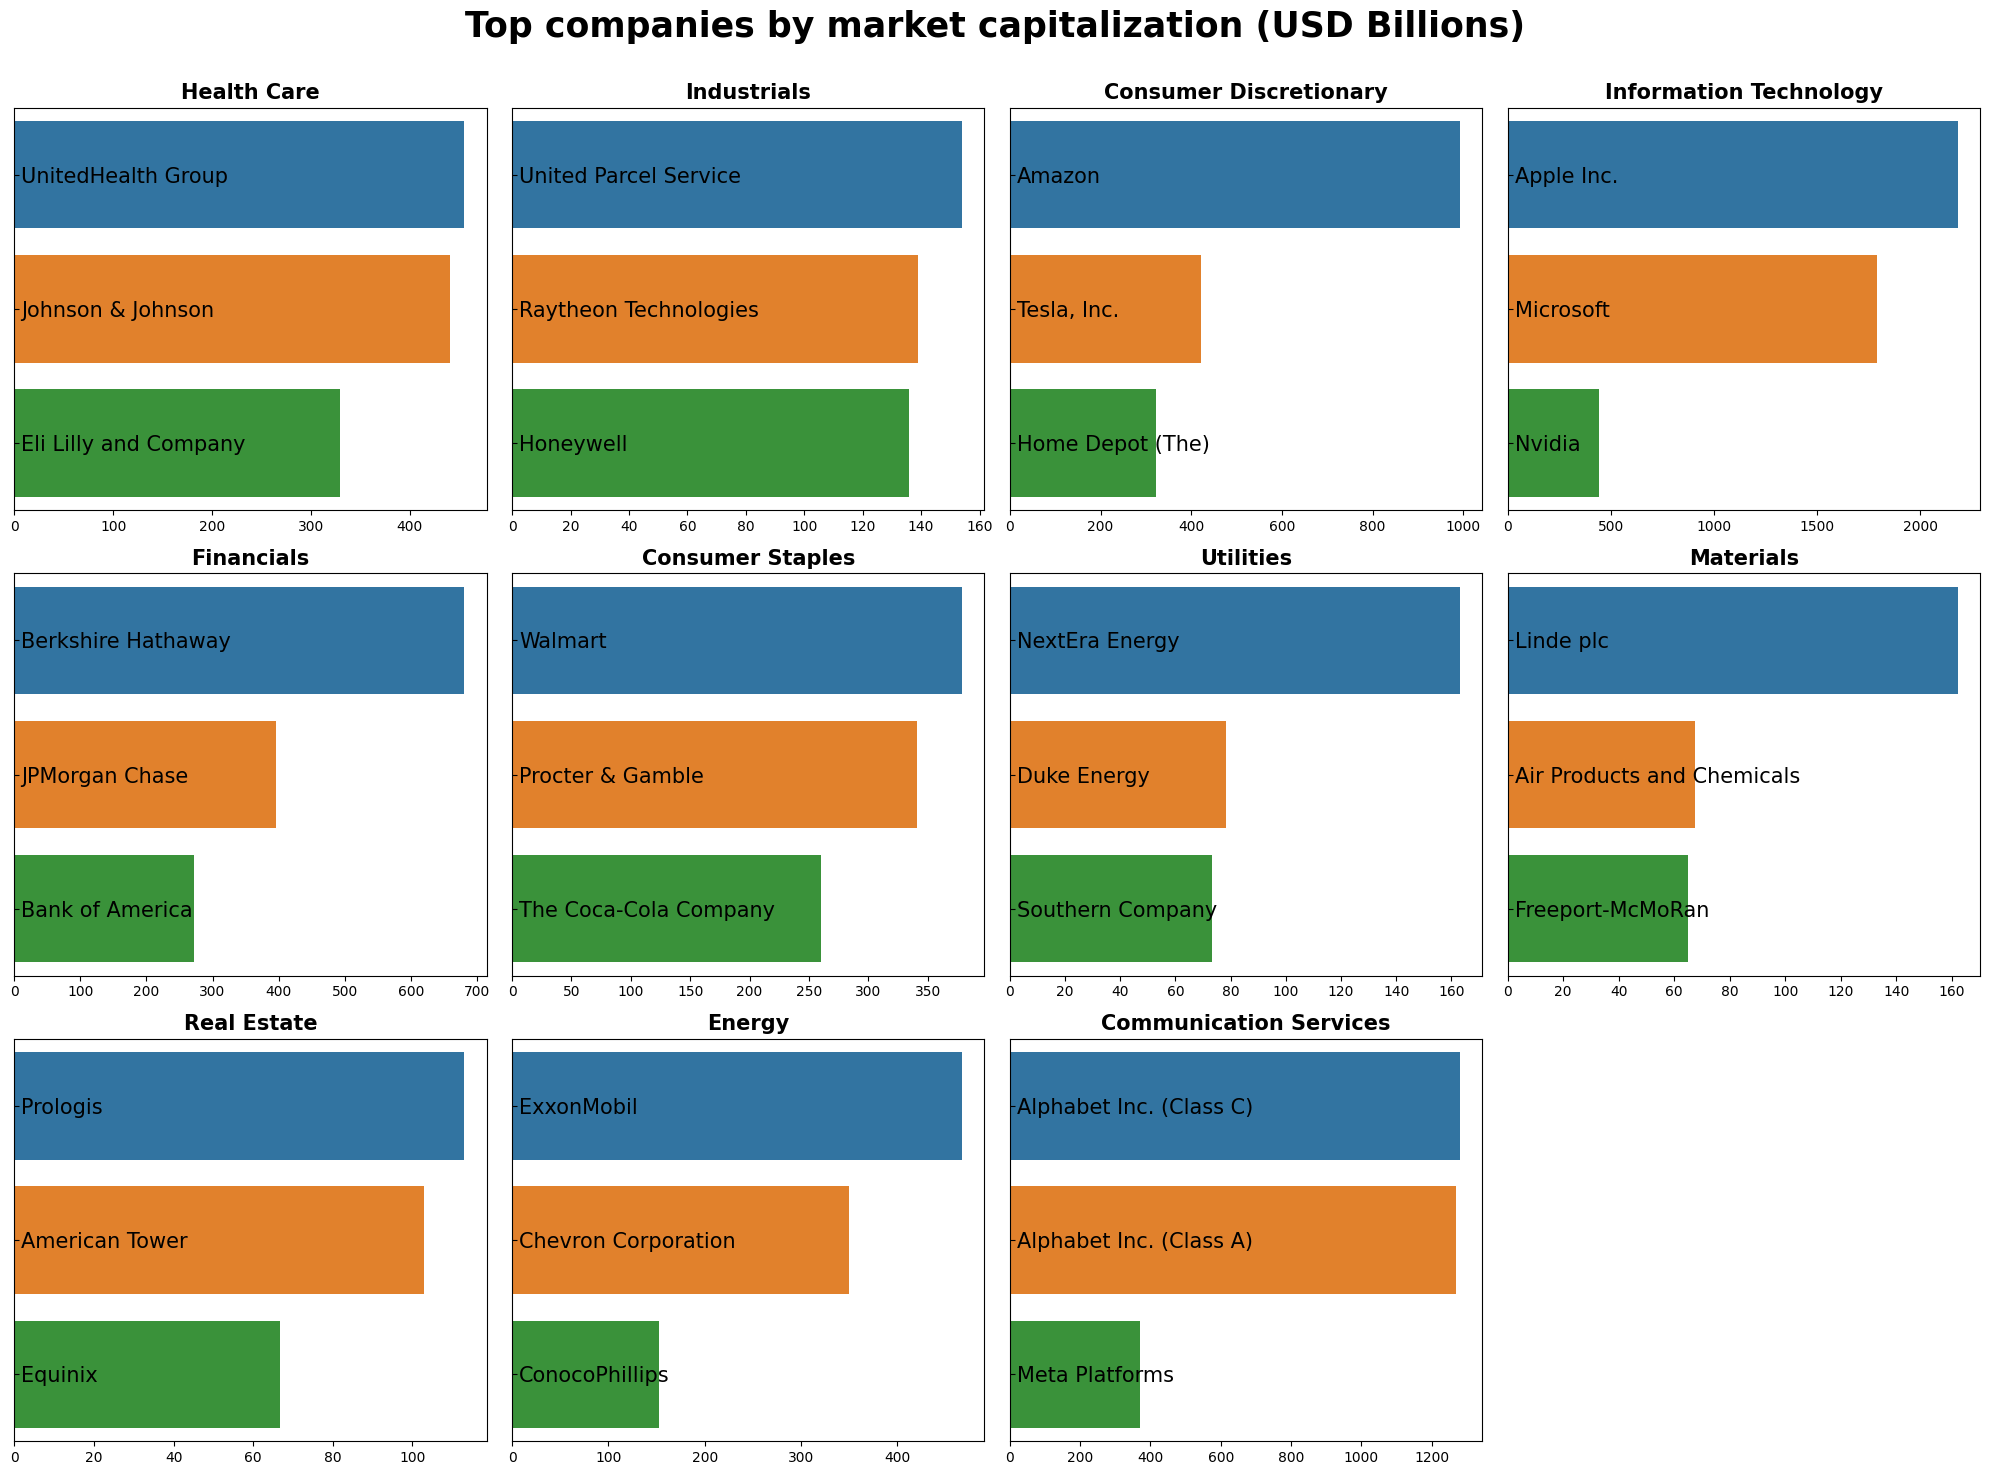

In [17]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Top companies by market capitalization (USD Billions)\n', weight='bold', size=25)

for sector,num in zip(list(data['Sector'].unique()),range(0,11)):
    plt.subplot(3,4,num+1)
    top_companies = data[data['Sector']==sector].sort_values('Market Cap', ascending=False).head(3)
    sns.barplot(x='Market Cap', y = 'Company', data = top_companies)
    plt.title(sector, size = 15, weight='bold')
    plt.xlabel(''); plt.ylabel('')
    plt.yticks(horizontalalignment = "left", size = 15); plt.tick_params(axis='y',direction='in',pad=-5)
plt.tight_layout()

In [18]:
# Mean values of each variable by sector
sector_groupby_mean = data.groupby('Sector').mean(numeric_only=True).round(3)
sector_groupby_mean

,Market Cap,Price,52 Week High,52 Week Low,Dividend Yield,Price/Sales,Price/Book,Price/Earnings,Earnings/Share,ROA,ROE,5Y Revenue Growth,1Y Implied Volatility
Sector,,,,,,,,,,,,,
Communication Services,170.597,85.083,127.262,62.612,0.014,2.340,4.234,21.672,4.754,0.065,0.605,0.682,0.404
Consumer Discretionary,65.645,326.152,384.507,238.172,0.015,2.368,12.445,17.962,18.375,0.097,-0.613,0.693,0.419
Consumer Staples,79.448,107.412,127.362,90.120,0.026,2.901,12.061,22.235,4.842,0.096,0.315,0.280,0.256
Energy,77.790,89.337,99.380,58.203,0.024,1.907,3.113,13.528,9.865,0.125,0.411,1.288,0.449
Financials,62.189,145.487,177.904,112.645,0.023,3.446,2.904,15.886,9.119,0.035,0.208,0.513,0.326
Health Care,80.807,230.310,274.090,173.864,0.010,4.468,16.143,24.389,11.292,0.114,0.606,3.483,0.339
Industrials,41.644,166.918,193.655,129.127,0.014,2.968,5.597,20.968,8.012,0.098,0.207,0.398,0.333
Information Technology,119.528,180.398,232.076,136.301,0.011,5.949,9.795,33.387,7.190,0.128,1.716,0.840,0.403
Materials,32.952,127.299,154.623,95.655,0.022,2.161,4.917,16.453,9.298,0.104,0.368,0.624,0.367


In [19]:
# Minimum values of each variable by sector 
sector_groupby_min = data.groupby('Sector').min(numeric_only=True).round(3)
sector_groupby_min

,Market Cap,Price,52 Week High,52 Week Low,Dividend Yield,Price/Sales,Price/Book,Price/Earnings,Earnings/Share,ROA,ROE,5Y Revenue Growth,1Y Implied Volatility
Sector,,,,,,,,,,,,,
Communication Services,5.401,5.22,12.93,4.96,0.00,0.29,0.41,3.09,0.70,0.01,-0.94,-0.25,0.21
Consumer Discretionary,6.225,10.47,21.05,6.11,0.00,0.31,0.73,0.00,-11.17,-0.12,-36.57,-0.87,0.00
Consumer Staples,10.821,34.71,41.30,30.06,0.00,0.23,0.80,7.27,1.63,0.03,-3.46,-0.58,0.00
Energy,12.461,18.64,20.20,15.77,0.01,0.31,1.29,5.63,0.77,0.02,0.05,-0.08,0.28
Financials,5.373,14.11,16.51,11.67,0.00,0.29,0.52,0.00,-4.78,0.00,-1.16,-0.23,0.23
Health Care,7.237,11.60,15.60,8.42,0.00,0.11,0.73,0.00,0.70,0.03,-2.67,-0.21,0.19
Industrials,6.319,16.34,21.42,11.65,0.00,0.23,1.38,0.00,-16.99,-0.07,-3.32,-0.60,0.23
Information Technology,6.534,15.95,17.76,11.90,0.00,0.40,0.95,0.00,-0.34,-0.01,-5.33,-0.30,0.26
Materials,7.793,11.88,13.60,10.42,0.01,0.44,0.81,4.16,0.81,0.04,0.07,-0.65,0.28


In [20]:
# Maximum values of each variable by sector  
sector_groupby_max = data.groupby('Sector').max(numeric_only=True).round(3)
sector_groupby_max

,Market Cap,Price,52 Week High,52 Week Low,Dividend Yield,Price/Sales,Price/Book,Price/Earnings,Earnings/Share,ROA,ROE,5Y Revenue Growth,1Y Implied Volatility
Sector,,,,,,,,,,,,,
Communication Services,1280.0,396.11,621.00,297.66,0.07,7.90,42.42,104.60,32.01,0.19,12.23,3.27,0.62
Consumer Discretionary,992.0,5024.07,5569.80,3576.01,0.07,10.42,245.19,49.99,447.81,0.29,1.32,9.72,0.73
Consumer Staples,379.0,480.11,612.27,406.51,0.08,8.60,76.51,44.19,13.39,0.23,3.04,1.10,0.37
Energy,467.0,239.40,288.46,194.54,0.06,4.52,9.51,39.60,29.16,0.24,3.26,11.89,0.61
Financials,681.0,741.71,831.32,503.12,0.06,18.89,23.59,50.64,37.55,0.18,4.46,4.32,0.55
Health Care,455.0,1561.53,1583.40,1065.55,0.04,15.47,473.82,151.71,54.96,0.45,19.29,169.41,0.70
Industrials,154.0,672.65,691.00,499.63,0.05,14.65,22.52,69.65,30.25,0.28,0.81,2.02,0.60
Information Technology,2180.0,570.78,645.31,415.07,0.05,16.99,55.08,293.45,35.18,0.35,91.83,3.28,0.72
Materials,162.0,347.69,406.85,284.99,0.05,5.24,35.39,33.40,31.81,0.34,2.93,2.74,0.58


##### **Average P/S, P/B, P/E and Div yield by Sector**

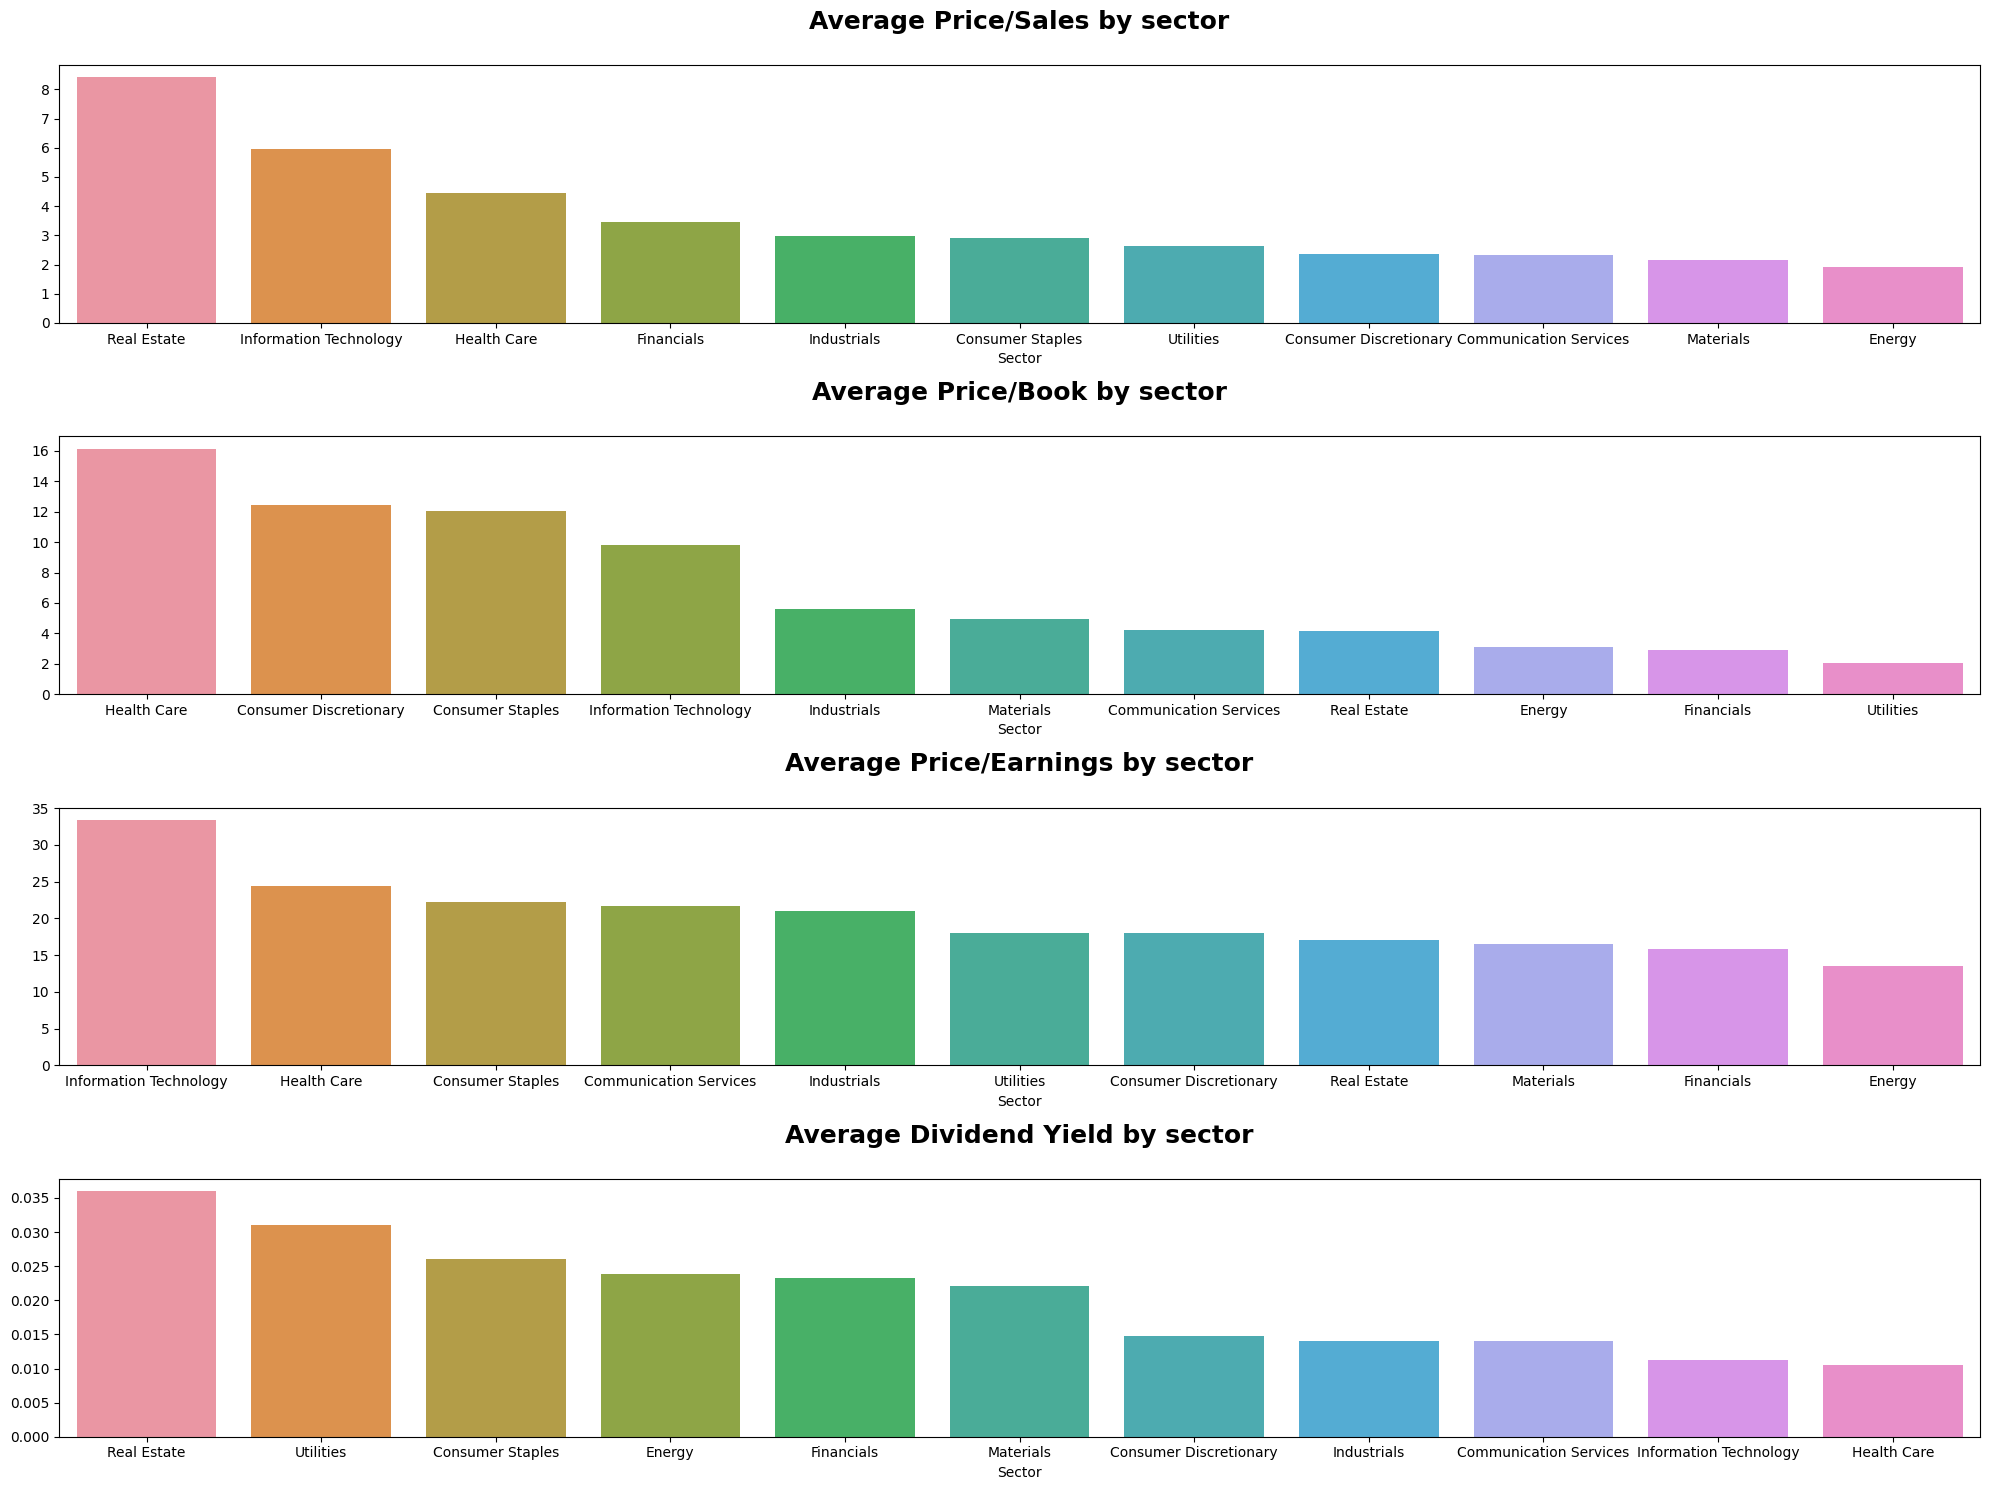

In [21]:
fig = plt.figure(figsize=(20,15))
metrics = ['Price/Sales', 'Price/Book','Price/Earnings','Dividend Yield']

# function to get biggest companies per sector according to its market capitalization
for metric,num in zip(metrics,range(0,4)):
    plt.subplot(4,1,num+1)
    sns.barplot(y=metric, x = 'Sector', data = data, order=data.groupby('Sector')[metric].agg('mean').sort_values(ascending=False).index, errorbar=None)
    plt.ylabel('')
    plt.title(f'Average {metric} by sector\n', size = 18, weight='bold')
plt.tight_layout()

- According to the P/S ratio, the Real Estate sector is the most expensive one, so the market is willing to pay a premium for every dollar of sales. May indicate that its companies are overvalued. The lower average value can indicate unrecognized value potential on Energy sector;
- The average P/B ratio for health care stocks is the highest out of all sectors;
- As verified for the P/S, Energy sector has the lowest P/E, which means its companies could by undervalued;
- Best dividend-paying companies belong to the Real Estate sector, which makes sense after analyzing Price/Sales ratio;

##### **Most volatile sectors**

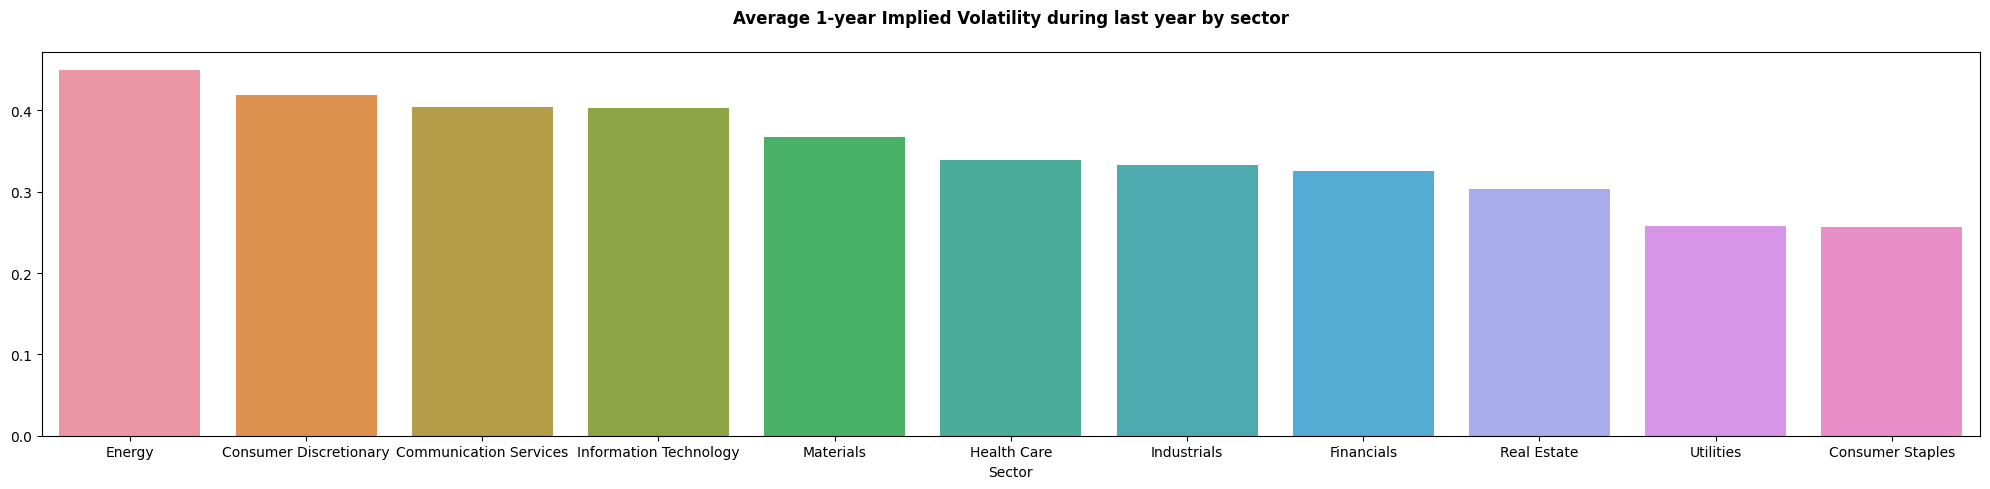

In [22]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x='Sector', y='1Y Implied Volatility', data=data, order=data.groupby('Sector')['1Y Implied Volatility'].agg('mean').sort_values(ascending=False).index, errorbar=None)
plt.title('Average 1-year Implied Volatility during last year by sector\n', weight='bold'); plt.ylabel('')
plt.tight_layout()

Investors of energy sector can potentialy benefit from high volatility. The geopolitical context has rise huge fluctuations in the prices of energy commodities, which are reflected in increased volatility of the stock prices from energy companies.

##### **Top Sectors by 5-year Revenue Growth**

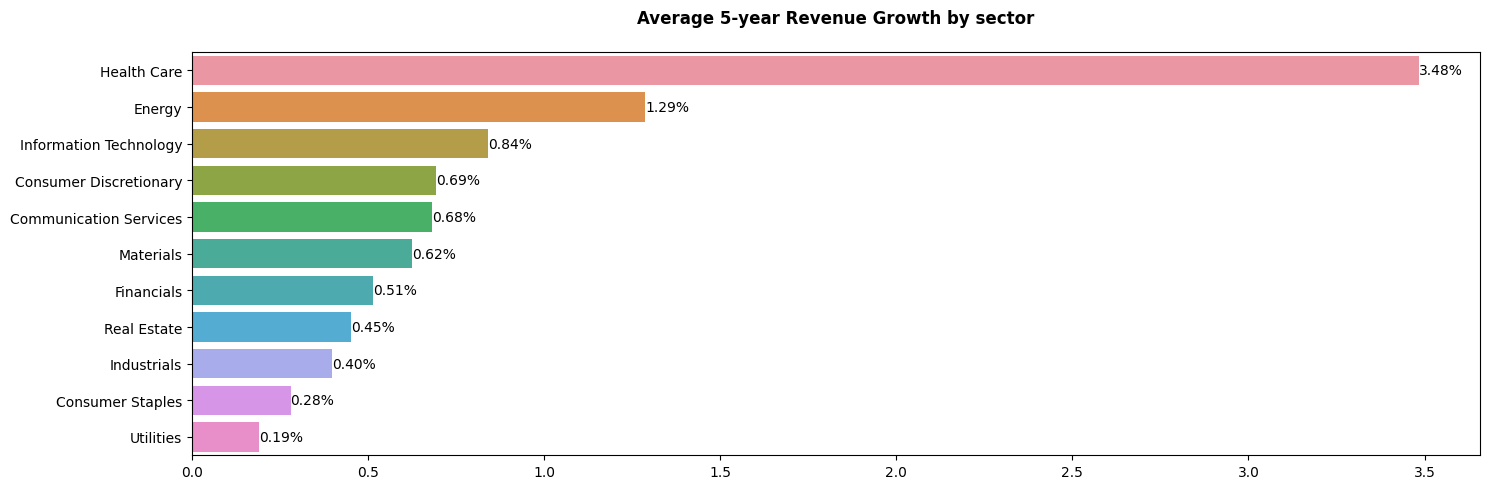

In [23]:
fig = plt.figure(figsize=(15,5))
ax = sns.barplot(y='Sector', x='5Y Revenue Growth', data=data, order=data.groupby('Sector')['5Y Revenue Growth'].agg('mean').sort_values(ascending=False).index, errorbar=None)
plt.title('Average 5-year Revenue Growth by sector\n', weight='bold'); plt.ylabel(''); plt.xlabel('')
plt.bar_label(ax.containers[0], fmt='%1.2f%%', label_type='edge')
plt.tight_layout()

Companies in the Health Care and Energy sectors are those whose revenues have grown the most on average over the past 5 years.

### **4. Companies Overview**

##### **Top 10 Companies by Market Capitalization**

Text(0, 0.5, '')

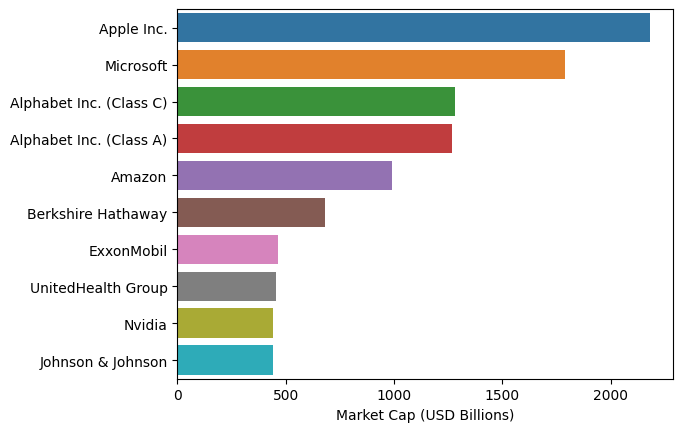

In [24]:
sns.barplot(y='Company', x='Market Cap', data=data.sort_values('Market Cap', ascending=False).head(10))
plt.xlabel('Market Cap (USD Billions)'); plt.ylabel('')

In [25]:
# Stats on Top 10 companies by MarketCap
top_comp_mktcap=data.drop(['Sector','Industry','52 Week Low','52 Week High'],axis=1).sort_values('Market Cap', ascending=False).head(10)
top_comp_mktcap

,Ticker,Company,Market Cap,Price,Dividend Yield,Price/Sales,Price/Book,Price/Earnings,Earnings/Share,ROA,ROE,5Y Revenue Growth,1Y Implied Volatility
3,AAPL,Apple Inc.,2180.0,137.87,0.01,5.43,42.47,22.14,6.11,0.28,1.61,0.72,0.33
319,MSFT,Microsoft,1790.0,240.22,0.01,8.72,9.96,24.99,9.28,0.20,0.42,1.20,0.32
206,GOOG,Alphabet Inc. (Class C),1280.0,99.28,0.00,4.67,4.79,18.65,5.03,0.19,0.26,1.85,0.36
207,GOOGL,Alphabet Inc. (Class A),1270.0,98.02,0.00,4.62,4.75,18.48,5.03,0.19,0.26,1.85,0.36
34,AMZN,Amazon,992.0,97.25,0.00,1.98,6.95,49.32,1.90,0.05,0.14,2.45,0.43
69,BRK.B,Berkshire Hathaway,681.0,309.87,0.00,2.70,1.45,21.53,14.18,0.03,0.06,0.23,0.23
495,XOM,ExxonMobil,467.0,113.35,0.03,1.24,2.37,8.76,12.71,0.15,0.30,0.26,0.35
460,UNH,UnitedHealth Group,455.0,486.72,0.01,1.40,5.56,21.83,22.19,0.09,0.27,0.61,0.26
340,NVDA,Nvidia,444.0,178.39,0.00,15.51,19.55,56.26,2.98,0.17,0.31,2.89,0.58
255,JNJ,Johnson & Johnson,441.0,168.74,0.03,4.69,5.94,17.06,9.94,0.15,0.35,0.30,0.19


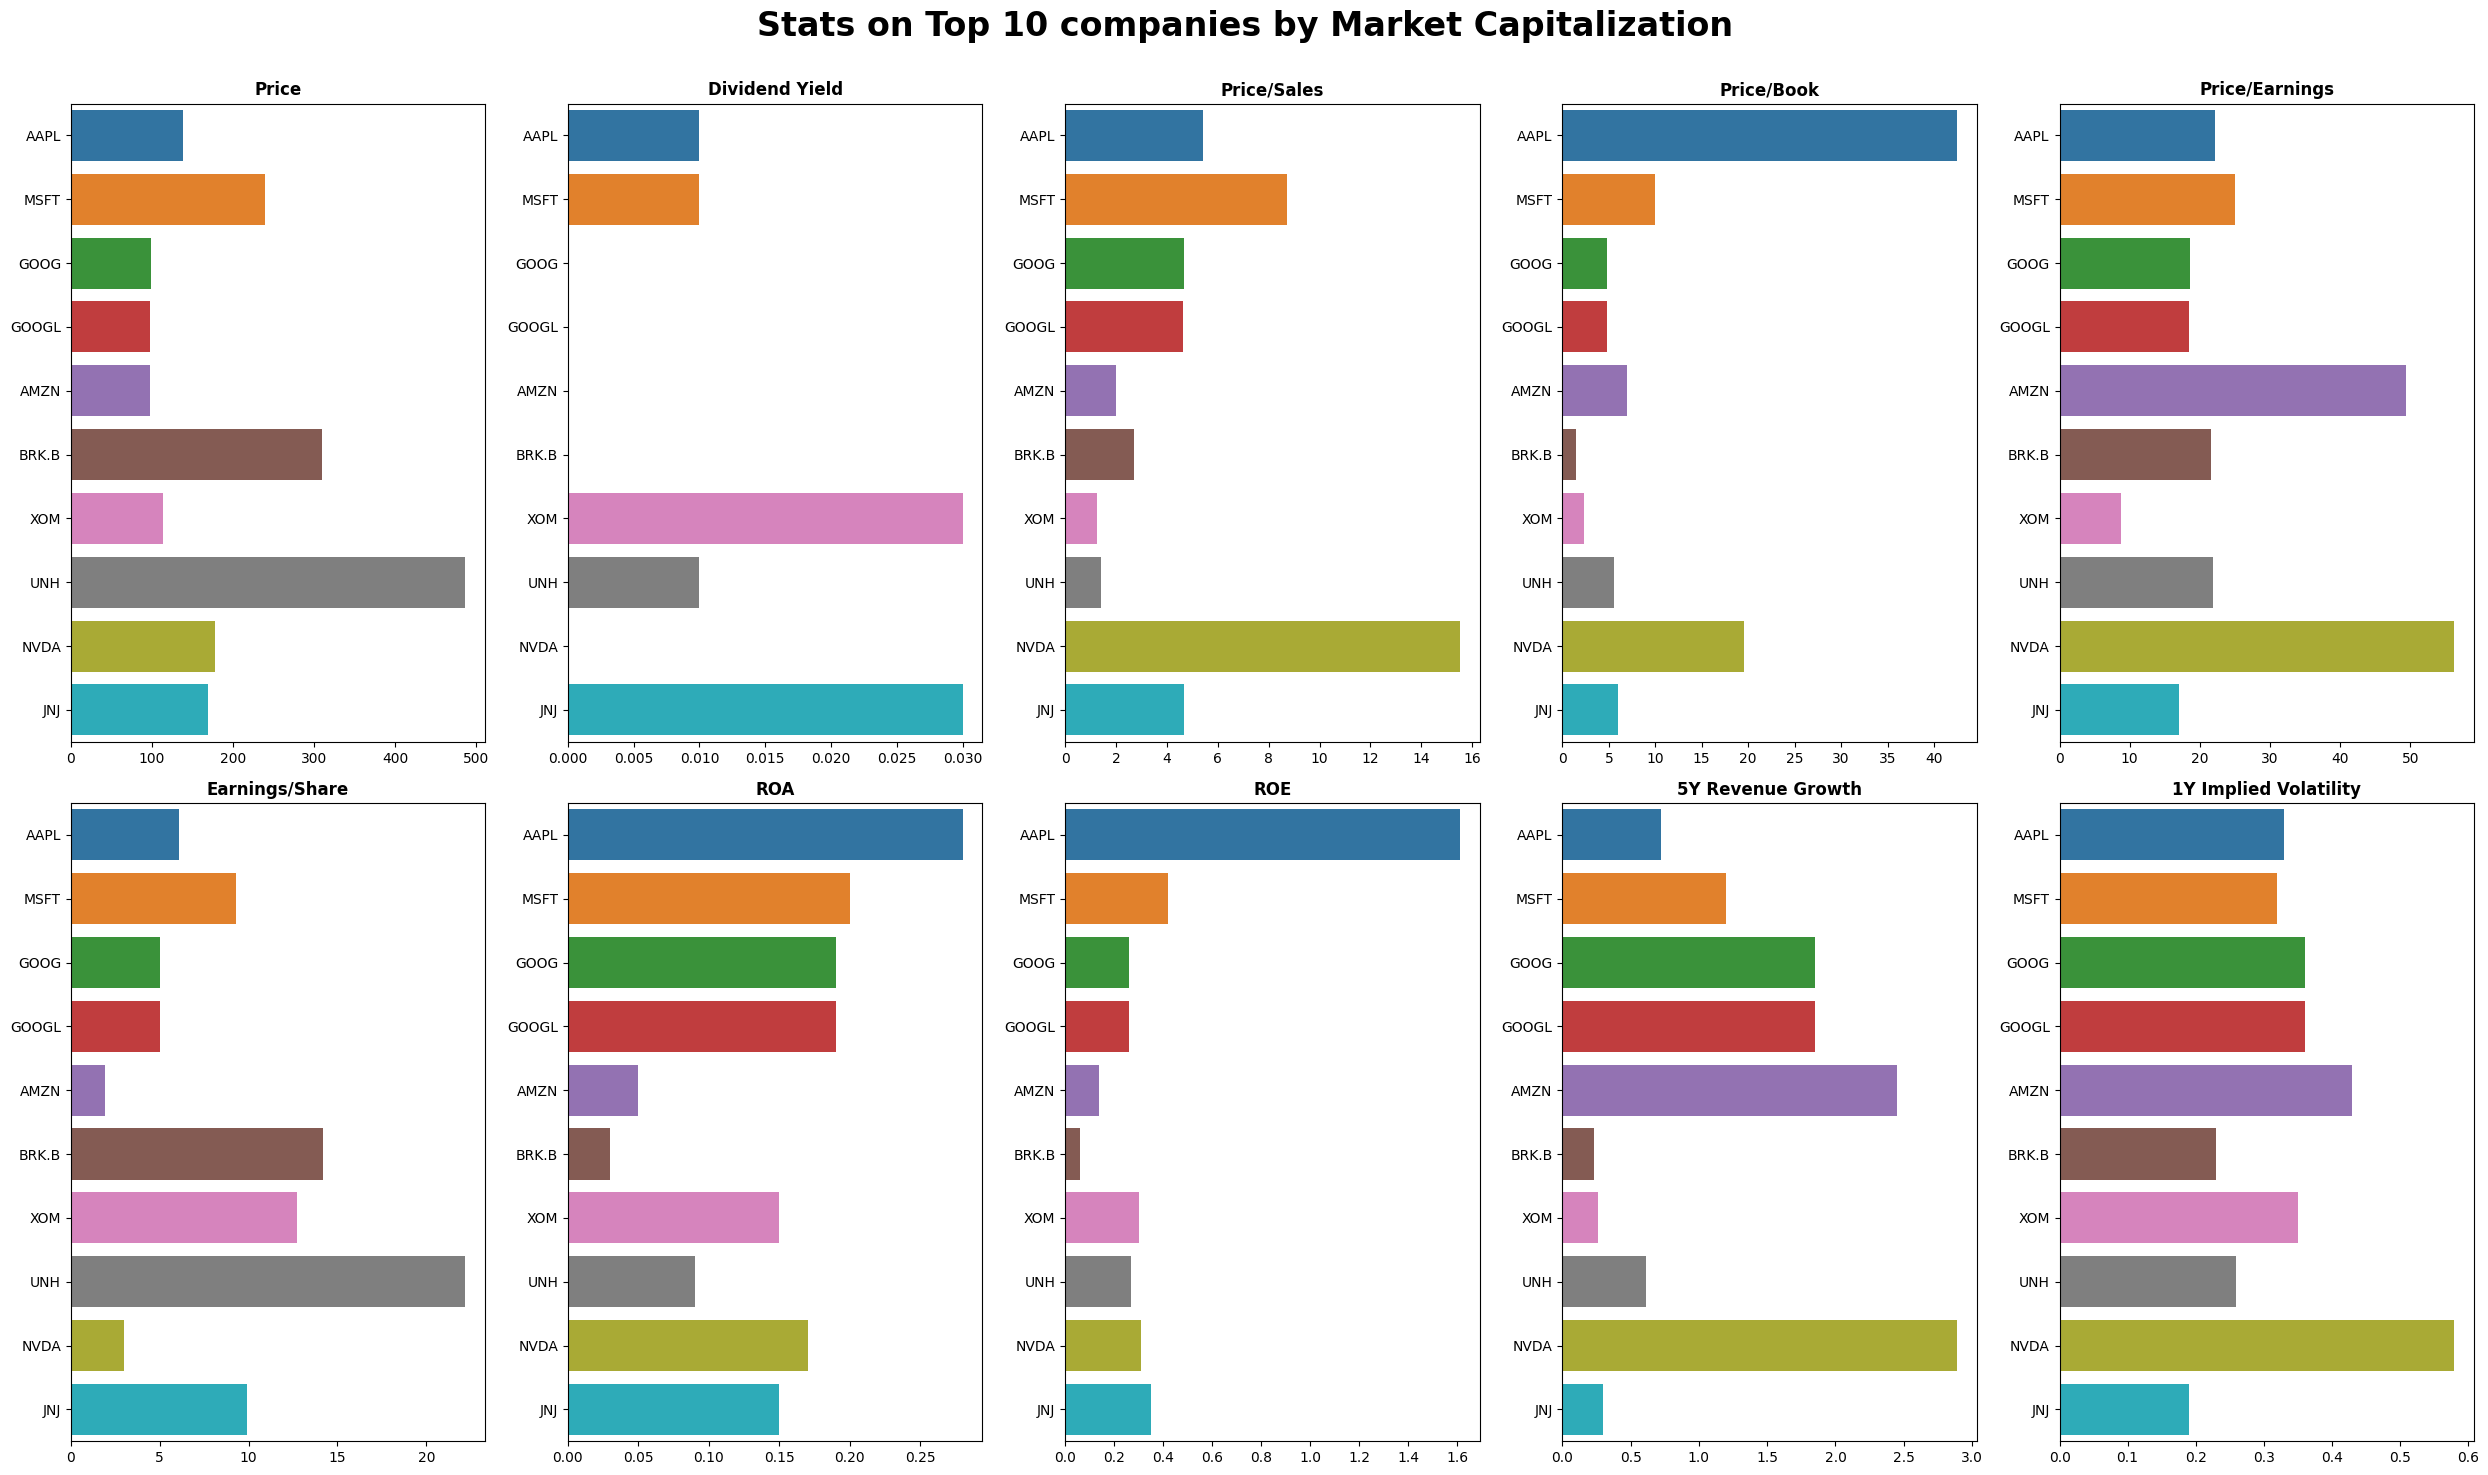

In [26]:
# Visualization
metrics = top_comp_mktcap.columns[3:]
plt.figure(figsize=(25,15))
plt.suptitle('Stats on Top 10 companies by Market Capitalization\n', weight='bold', size=24)
for i in range(len(metrics)):
    plt.subplot(2,5,i+1)
    ax = sns.barplot(x=metrics[i],y='Ticker', data=top_comp_mktcap)
    plt.xlabel(''); plt.ylabel('');
    plt.title(metrics[i], weight='bold')
plt.tight_layout()

AAPL's dominance of ROA and ROE shows how efficient it is in using its assets to generate profits.

##### **Top 5 companies according to other financial criteria**

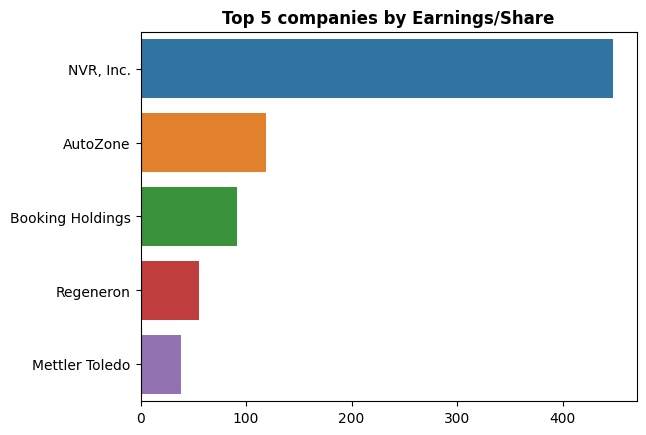

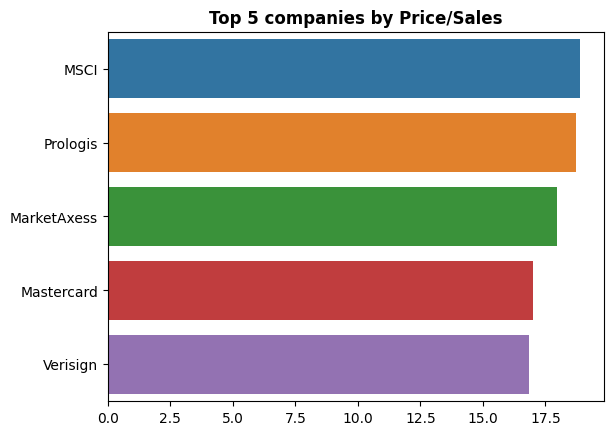

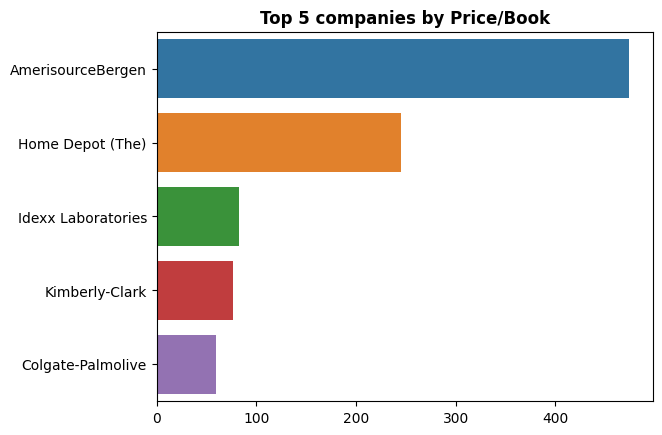

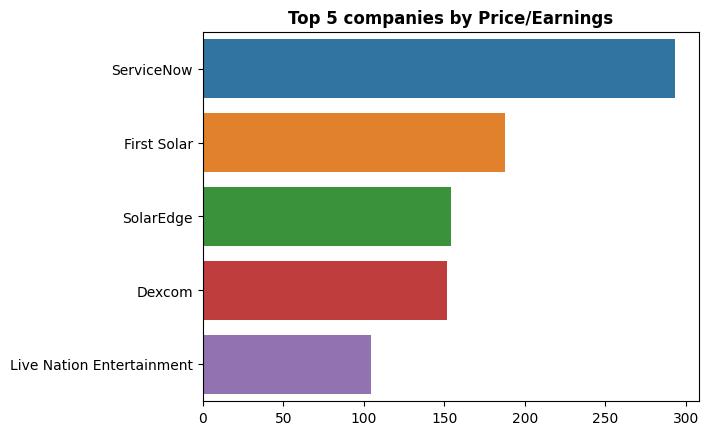

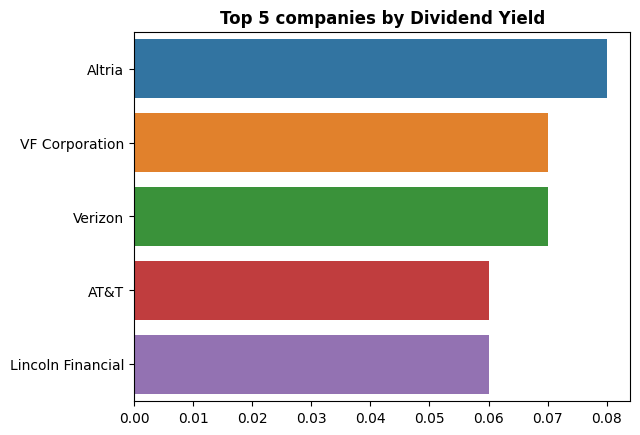

In [27]:
metrics = ['Earnings/Share', 'Price/Sales', 'Price/Book','Price/Earnings','Dividend Yield']
for metric in metrics:
    sns.barplot(x=metric, y='Company', data=data.sort_values(metric, ascending=False).head(5))
    plt.title(f'Top 5 companies by {metric}', weight='bold')
    plt.ylabel(''); plt.xlabel('')
    plt.show()

##### **Top 10 companies according to the growth of its stock price in last 52 weeks**

In [28]:
growth = np.asarray(data['52 Week High']-data['52 Week Low'])
top_comp_growth = pd.DataFrame({'Company':data['Company'], 'Sector':data['Sector'],'Stock Growth':growth})
top_comp_growth.sort_values('Stock Growth', ascending=False).head(10)

,Company,Sector,Stock Growth
341,"NVR, Inc.",Consumer Discretionary,1993.79
64,Booking Holdings,Consumer Discretionary,1098.81
51,AutoZone,Consumer Discretionary,906.73
101,Chipotle Mexican Grill,Consumer Discretionary,558.28
323,Mettler Toledo,Health Care,517.85
411,SVB Financial,Financials,460.37
23,Align Technology,Health Care,379.95
66,BlackRock,Financials,328.20
161,EPAM Systems,Information Technology,327.81
62,Bio-Rad,Health Care,325.98


##### **Number of outstanding shares (billions) of each company**

In [29]:
num_shares = data[['Ticker','Company','Sector','Market Cap','Price']].copy()
num_shares['Shares number'] = (num_shares['Market Cap']/num_shares['Price'])
num_shares.sort_values('Shares number', ascending=False)

,Ticker,Company,Sector,Market Cap,Price,Shares number
3,AAPL,Apple Inc.,Information Technology,2180.000000,137.87,15.811997
207,GOOGL,Alphabet Inc. (Class A),Communication Services,1270.000000,98.02,12.956539
206,GOOG,Alphabet Inc. (Class C),Communication Services,1280.000000,99.28,12.892828
34,AMZN,Amazon,Consumer Discretionary,992.000000,97.25,10.200514
53,BAC,Bank of America,Financials,272.000000,33.85,8.035451
...,...,...,...,...,...,...
62,BIO,Bio-Rad,Health Care,13.638212,457.29,0.029824
101,CMG,Chipotle Mexican Grill,Consumer Discretionary,43.111420,1555.19,0.027721
323,MTD,Mettler Toledo,Health Care,34.812752,1561.53,0.022294
51,AZO,AutoZone,Consumer Discretionary,43.661164,2326.61,0.018766


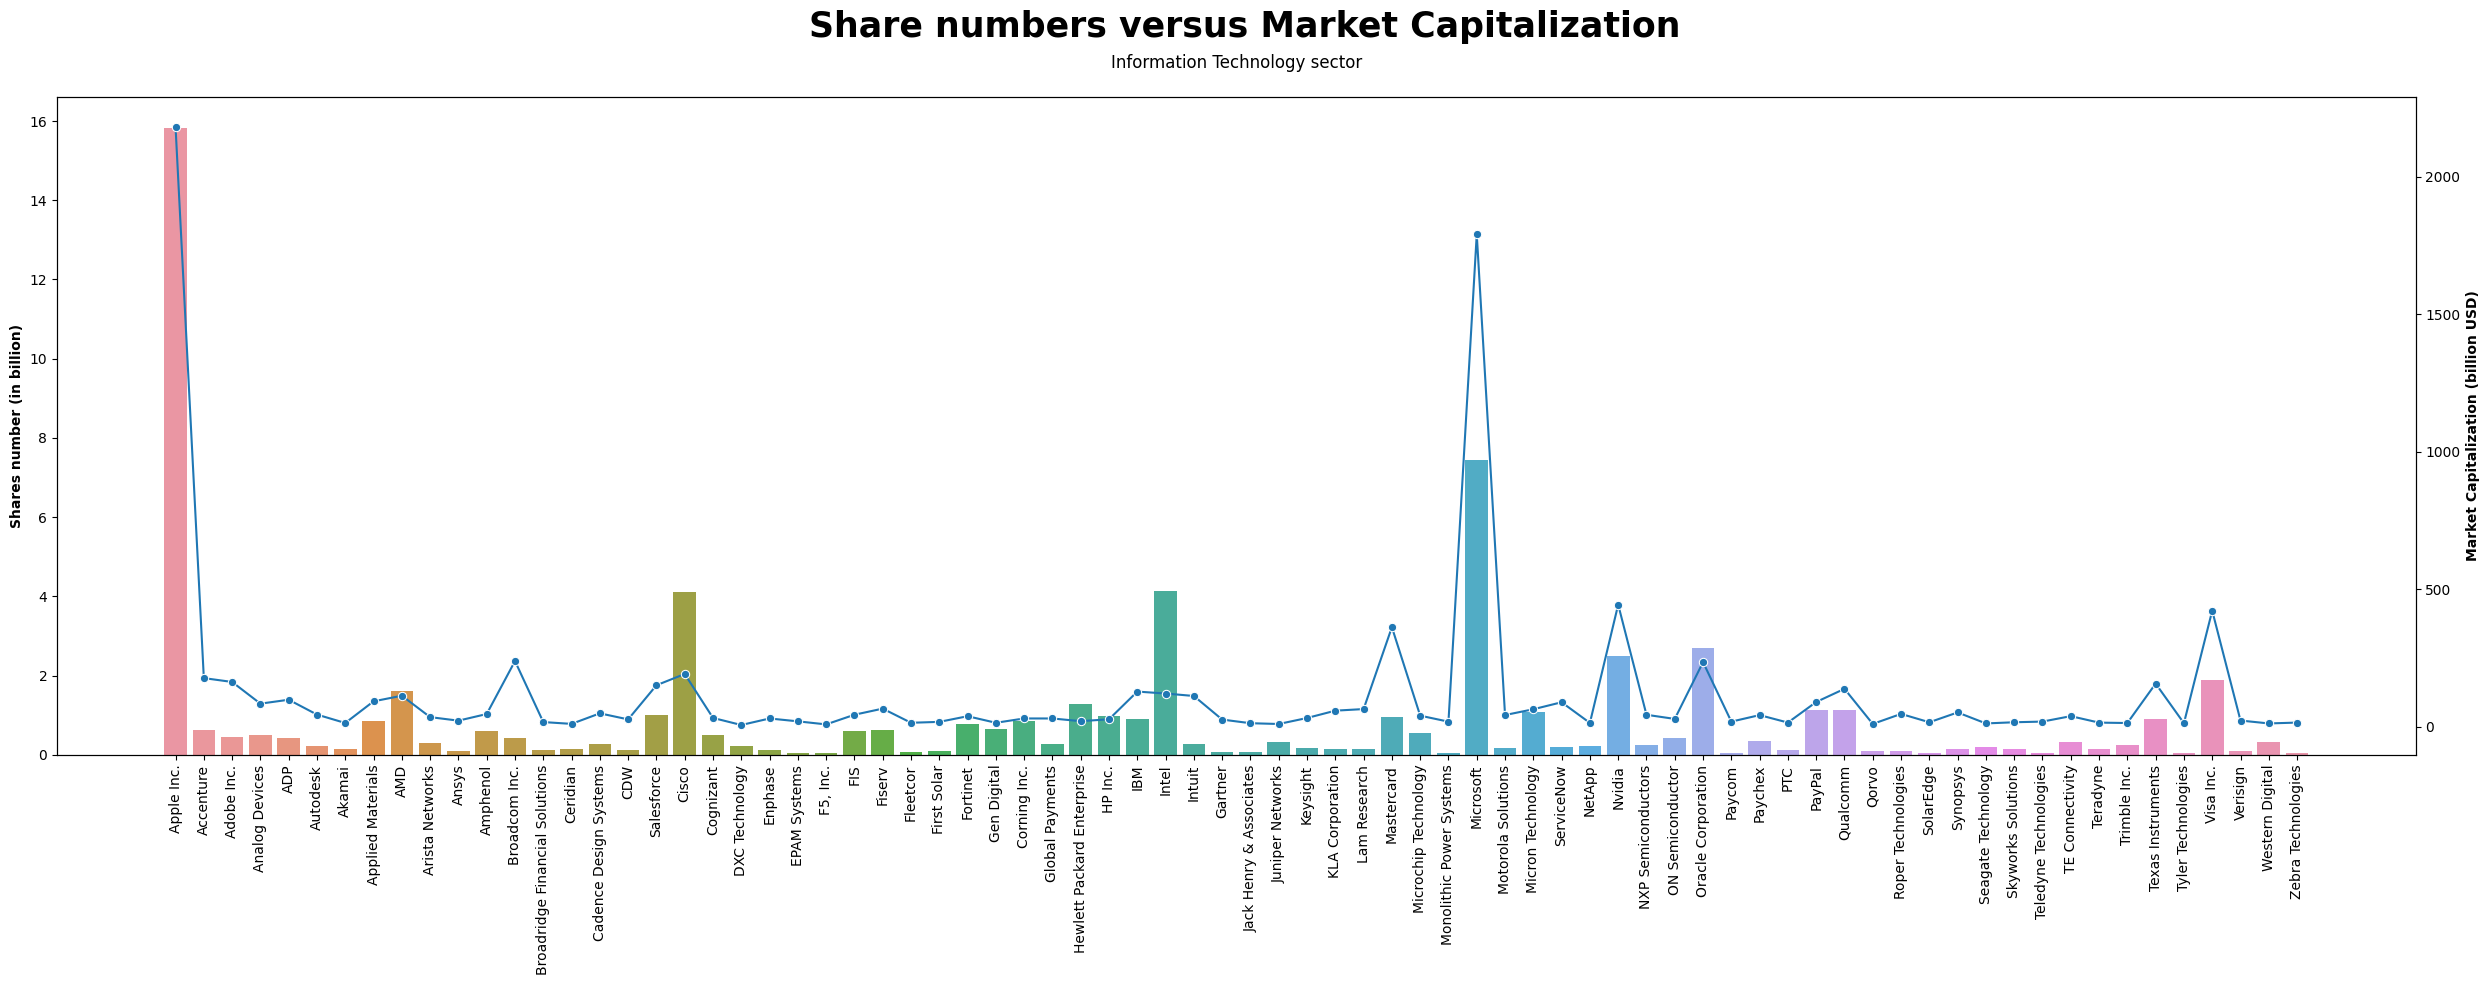

In [30]:
# Visualization - Share numbers versus Market Cap (tech stocks)
plt.figure(figsize=(25,10))
ax = sns.barplot(x='Company',y='Shares number',data=num_shares[num_shares['Sector']=='Information Technology'])
plt.suptitle('Share numbers versus Market Capitalization', weight='bold', size=25); plt.title('Information Technology sector\n')
plt.ylabel('Shares number (in billion)', weight='bold')
plt.xticks(rotation=90); plt.xlabel('')

ax2 = ax.twinx()
sns.lineplot(x='Company', y='Market Cap', data=num_shares[num_shares['Sector']=='Information Technology'], marker='o')
plt.ylabel('Market Capitalization (billion USD)', weight='bold')
plt.tight_layout()

- IBM and Intel:

It's shares has an approximated value of \\$141 and \\$29, respectively. 
Since these companies have the same market cap, it means that there is a big difference in the outstanding shares numbers of both.
This creates the idea that IBM is a costly company and Intel is a penny company, which is not true, given that in terms of market cap they have the same value.

##### **Buy-worthy stocks**
Searching for stocks that meet these criteria:
1. P/E and P/B both below sector average;
2. P/B under 1;
3. Price below it's average of 52-week high and low.

In [31]:
buystocks = pd.DataFrame()
for sector in list(data['Sector'].unique()):
    data_by_sec = data[data['Sector']==sector]
    data_by_sec_1 = data_by_sec[(data_by_sec['Price/Earnings']<data_by_sec['Price/Earnings'].mean()) & 
        (data_by_sec['Price/Book']<data_by_sec['Price/Book'].mean()) & 
        (data_by_sec['Price/Sales'] < 1)]
    buystocks = pd.concat([buystocks,data_by_sec_1]).sort_values('Market Cap', ascending=False)
print('Top 20 companies by market cap that meet the criteria mentioned:\n')
print(buystocks.iloc[:,:2].head(20))
print('\n Buy-worthy stocks by sector:\n')
buystocks['Sector'].value_counts()

Top 20 companies by market cap that meet the criteria mentioned:

    Ticker                       Company
430      T                          AT&T
156    ELV               Elevance Health
123    CVS                    CVS Health
74       C                     Citigroup
94      CI                         Cigna
230    HUM                        Humana
312    MPC            Marathon Petroleum
299    MET                       MetLife
468    VLO                 Valero Energy
382    PSX                   Phillips 66
204     GM                General Motors
176      F            Ford Motor Company
181    FDX                         FedEx
11     ADM                           ADM
18     AIG  American International Group
104    CNC           Centene Corporation
140    DOW                      Dow Inc.
339    NUE                         Nucor
380    PRU          Prudential Financial
133    DHI                   D.R. Horton

 Buy-worthy stocks by sector:



Consumer Discretionary    15
Health Care               10
Industrials                8
Materials                  7
Financials                 6
Communication Services     5
Consumer Staples           4
Energy                     3
Information Technology     3
Real Estate                1
Utilities                  1
Name: Sector, dtype: int64

### **5. Price prediction**
In this section we are going to predict the stock price of the S&P 500 companies using the mentioned variables as features. Here, we will use two different regression methods: Linear Regression and XGBoost as an ensemble learning algorithm. At the end we will compare the predictions generated by both models.

##### **Data Preprocessing**

In [32]:
data2 =  data.copy()

# Fill missing values with the sector average
for column in data2.columns[data2.isna().any()]:
    data2[column] = data2.groupby("Sector")[column].transform(lambda x: x.fillna(x.mean()))

# Scalling the data
from sklearn.preprocessing import MinMaxScaler
data2 = data2.select_dtypes(exclude=['object']) # Drop unnecessary columns
scaler = MinMaxScaler()
data_scal = pd.DataFrame(scaler.fit_transform(data2), columns=data2.columns)

# Splitting the dataset into 80% training and 20% test
from sklearn.model_selection import train_test_split
X = data_scal.drop(['Price'], axis=1)
y = data_scal['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

##### **Linear Regression**

In [33]:
from sklearn.linear_model import LinearRegression

# model training
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

In [34]:
# display regression coefficients
print(model_1.intercept_.round(3))
print(model_1.coef_.round(3))

-0.007
[-0.006  0.3    0.663 -0.001  0.     0.002 -0.001  0.04   0.001  0.007
  0.001  0.004]


##### **XGBoost Regression**

In [35]:
from xgboost import XGBRegressor
model_2 = XGBRegressor()
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

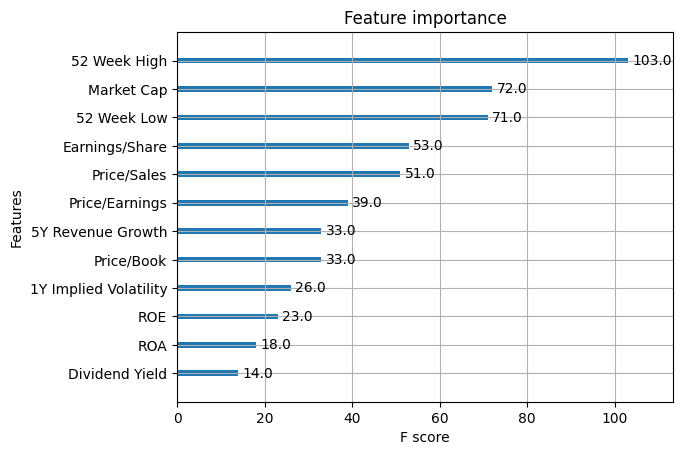

In [36]:
# Plotting feature importance
from xgboost import plot_importance
plot_importance(model_2)

An advantage of using decision tree models like gradient boosting is that they can provide estimates of feature importante form a trained predictive model. As we can see, 52 Week High is the most important variable, that is, it's the most used feature to make key decisions with decision tres.

In [37]:
# Scalling back the results
variables = [y_train, y_test, y_pred_1, y_pred_2]
y_train, y_test, y_pred_1, y_pred_2 = (i * ((data2['Price'].max(axis=0)- data2['Price'].min(axis=0))) + data2['Price'].min(axis=0) for i in variables)

##### **Perfomance evaluation**

In [38]:
# Comparing the predictions generate from both models
pred_df = pd.DataFrame({'Test Data': y_test, 'Predicted LR': y_pred_1, 'Predicted XGB':y_pred_2})
pred_df.head(5)

,Test Data,Predicted LR,Predicted XGB
402,123.15,135.062138,123.877670
403,94.36,91.439762,90.584167
404,296.81,314.960311,319.420776
405,127.79,200.708395,152.721680
406,105.04,82.846028,110.017517


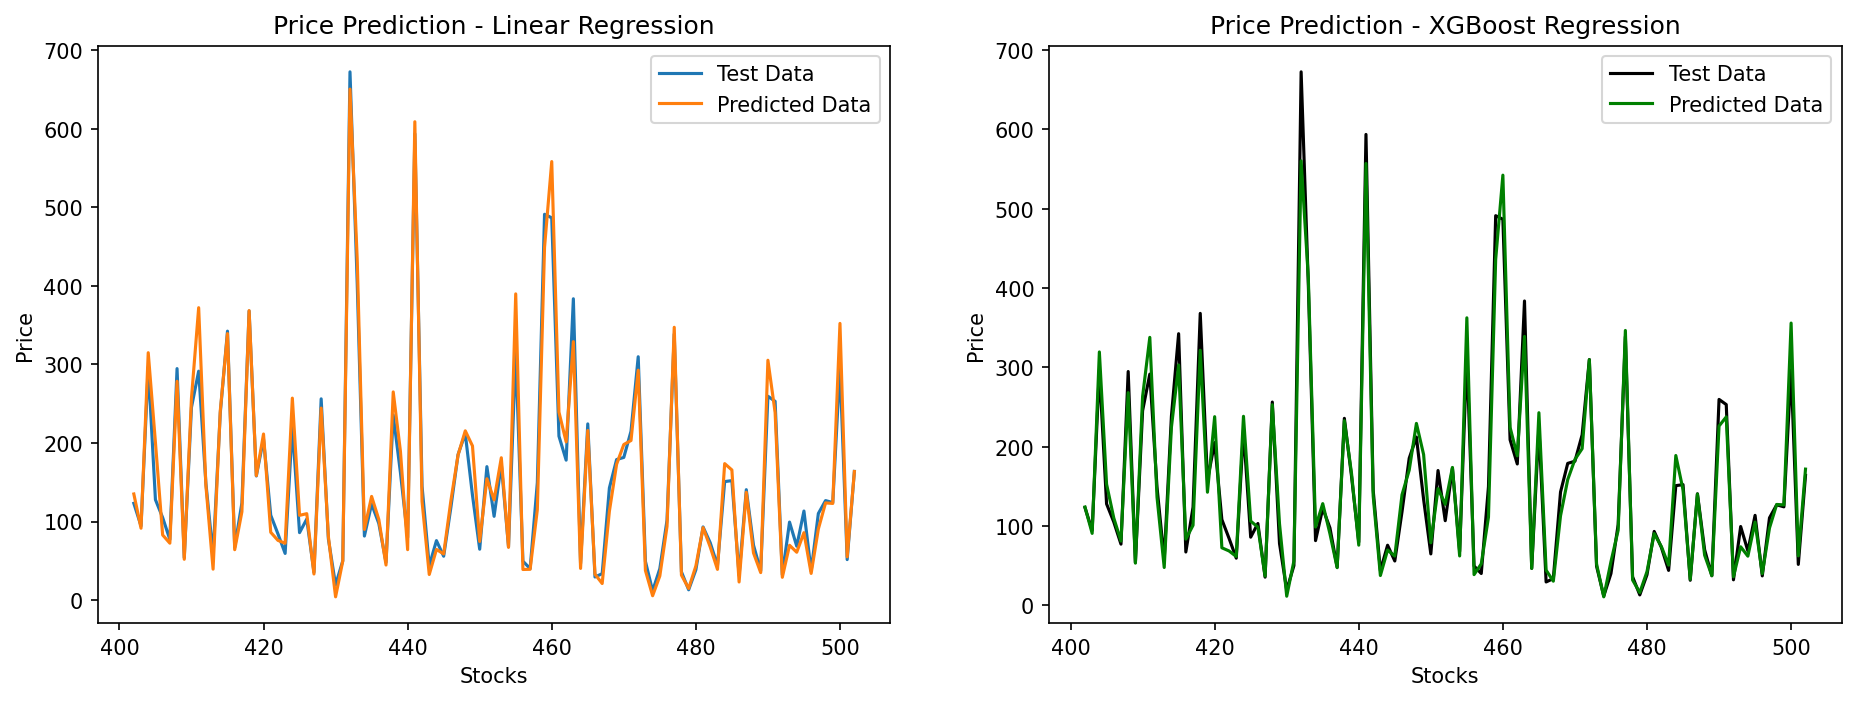

In [39]:
# Plotting predicted values
plt.figure(figsize=(15,5), dpi=150)
plt.subplot(1,2,1)
plt.plot(pred_df[['Test Data','Predicted LR']])
plt.title ('Price Prediction - Linear Regression')
plt.ylabel('Price')
plt.xlabel('Stocks')
plt.legend(['Test Data','Predicted Data'])

plt.subplot(1,2,2)
plt.plot(pred_df['Test Data'], color='black')
plt.plot(pred_df['Predicted XGB'], color='green')
plt.title ('Price Prediction - XGBoost Regression')
plt.ylabel('Price')
plt.xlabel('Stocks')
plt.legend(['Test Data','Predicted Data'])

In [40]:
from tabulate import tabulate
from sklearn.metrics import mean_absolute_error, mean_squared_error
perf_data = [['Mean Absolute Error', mean_absolute_error(y_test, y_pred_1), mean_absolute_error(y_test, y_pred_2)],
['Mean Squared Error', mean_squared_error(y_test, y_pred_1), mean_squared_error(y_test, y_pred_2)],
['Root Mean Squared Error', np.sqrt(mean_squared_error(y_test, y_pred_1)),np.sqrt(mean_squared_error(y_test, y_pred_2))]]
print(tabulate(perf_data, headers = ['Metrics','Linear Regression','XGBoost'], numalign="center"))

Metrics                   Linear Regression    XGBoost
-----------------------  -------------------  ---------
Mean Absolute Error            15.5209         15.7807
Mean Squared Error             542.573         555.417
Root Mean Squared Error        23.2932         23.5673


Overall the predicted values looks good for the test data.
Due to having slightly lower values on each error metric, the predictions made by linear regression model perform better.

